## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = '../part01/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
age=app_train[['TARGET','DAYS_BIRTH']]
age['DAYS_BIRTH']=abs(age['DAYS_BIRTH']/365)
age['BIN']=pd.cut(age['DAYS_BIRTH'],bins=10)
print('age', age.head())
print(age['BIN'].value_counts())

gcut10 = age['BIN'].unique()
gcut10=gcut10.sort_values()
gcut10

age    TARGET  DAYS_BIRTH               BIN
0       1   25.920548  (25.378, 30.238]
1       0   45.931507  (44.819, 49.679]
2       0   52.180822   (49.679, 54.54]
3       0   52.068493   (49.679, 54.54]
4       0   54.608219     (54.54, 59.4]
(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: BIN, dtype: int64


[(20.469, 25.378], (25.378, 30.238], (30.238, 35.099], (35.099, 39.959], (39.959, 44.819], (44.819, 49.679], (49.679, 54.54], (54.54, 59.4], (59.4, 64.26], (64.26, 69.121]]
Categories (10, interval[float64]): [(20.469, 25.378] < (25.378, 30.238] < (30.238, 35.099] < (35.099, 39.959] ... (49.679, 54.54] < (54.54, 59.4] < (59.4, 64.26] < (64.26, 69.121]]

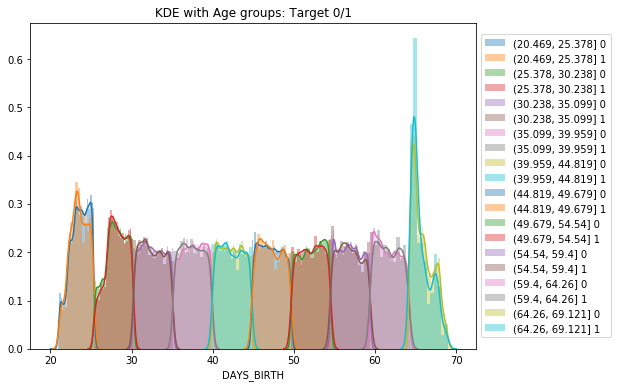

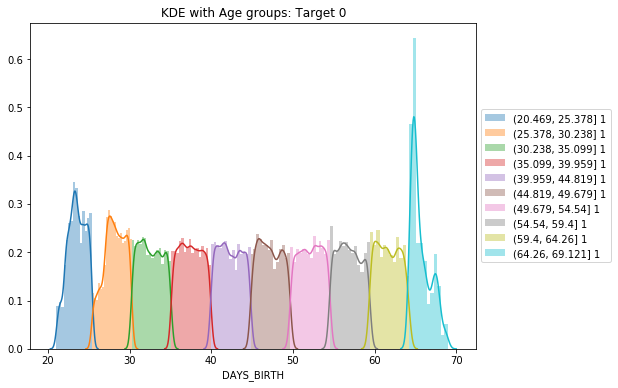

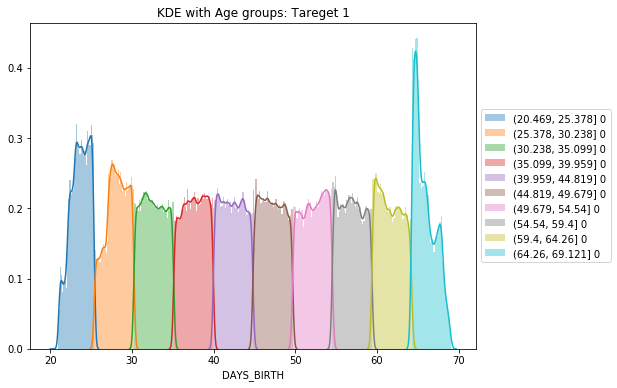

In [5]:

plt.figure(figsize=(8,6))
for i in gcut10:
    sns.distplot(age.loc[(age['BIN'] == i) & \
                              (age['TARGET'] == 0), 'DAYS_BIRTH'], label = str(i)+str(' ')+str(0))
 
    sns.distplot(age.loc[(age['BIN'] == i) & \
                              (age['TARGET'] == 1), 'DAYS_BIRTH'], label = str(i)+str(' ')+str(1))
plt.title('KDE with Age groups: Target 0/1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


plt.figure(figsize=(8,6))
for i in gcut10:
    sns.distplot(age.loc[(age['BIN'] == i) & \
                              (age['TARGET'] == 1), 'DAYS_BIRTH'], label = str(i)+str(' ')+str(1))
plt.title('KDE with Age groups: Target 0')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


plt.figure(figsize=(8,6))
for i in gcut10:
    sns.distplot(age.loc[(age['BIN'] == i) & \
                              (age['TARGET'] == 0), 'DAYS_BIRTH'], label = str(i)+str(' ')+str(0))
plt.title('KDE with Age groups: Tareget 1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

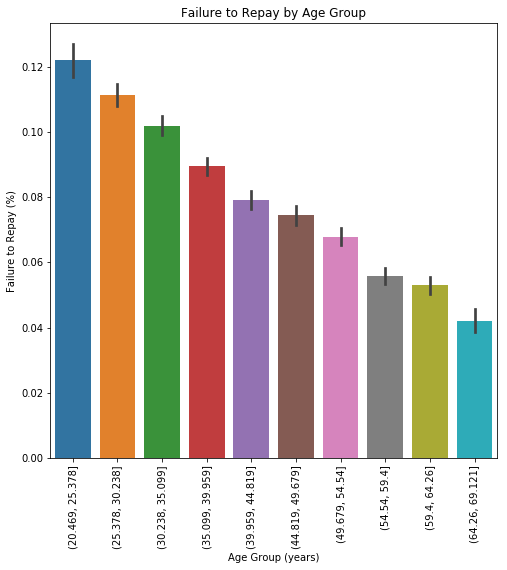

In [6]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = 'BIN'
py = 'TARGET'
sns.barplot(px, py, data=age)

# Plot labeling
plt.xticks(rotation = 90); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [7]:
ageq=app_train[['TARGET','DAYS_BIRTH']]
ageq['DAYS_BIRTH']=abs(ageq['DAYS_BIRTH']/365)

ageq['BIN']=pd.qcut(ageq['DAYS_BIRTH'],10)
print('ageq', ageq.head())
print(ageq['BIN'].value_counts())

gqcut10 = ageq['BIN'].unique()
gqcut10=gqcut10.sort_values()
gqcut10

ageq    TARGET  DAYS_BIRTH               BIN
0       1   25.920548  (20.517, 28.175]
1       0   45.931507  (43.151, 47.178]
2       0   52.180822   (51.74, 56.093]
3       0   52.068493   (51.74, 56.093]
4       0   54.608219   (51.74, 56.093]
(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: BIN, dtype: int64


[(20.517, 28.175], (28.175, 32.038], (32.038, 36.0], (36.0, 39.496], (39.496, 43.151], (43.151, 47.178], (47.178, 51.74], (51.74, 56.093], (56.093, 60.77], (60.77, 69.121]]
Categories (10, interval[float64]): [(20.517, 28.175] < (28.175, 32.038] < (32.038, 36.0] < (36.0, 39.496] ... (47.178, 51.74] < (51.74, 56.093] < (56.093, 60.77] < (60.77, 69.121]]

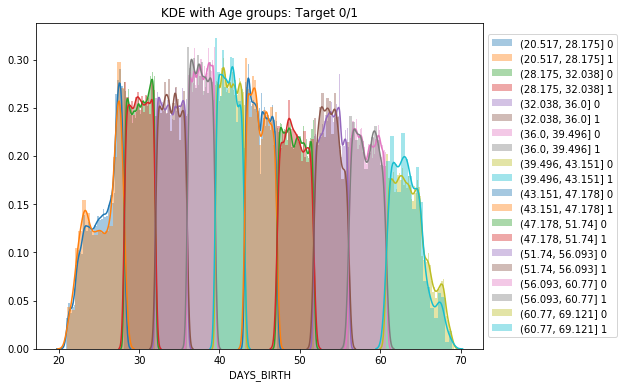

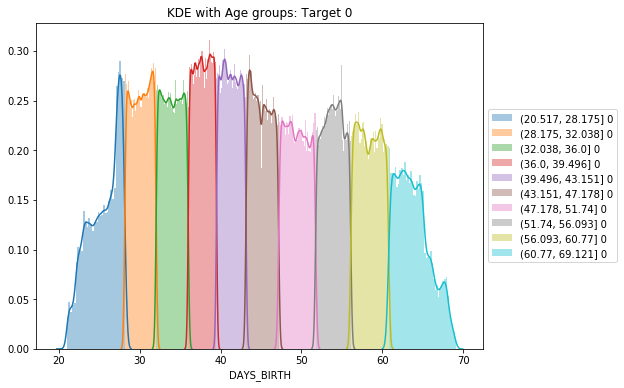

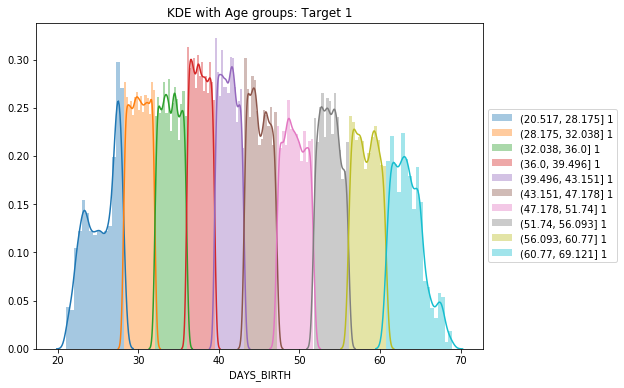

In [8]:
plt.figure(figsize=(8,6))
for i in gqcut10:
    sns.distplot(ageq.loc[(ageq['BIN'] == i) & \
                              (ageq['TARGET'] == 0), 'DAYS_BIRTH'], label = str(i)+str(' ')+str(0))
 
    sns.distplot(ageq.loc[(ageq['BIN'] == i) & \
                              (ageq['TARGET'] == 1), 'DAYS_BIRTH'], label = str(i)+str(' ')+str(1))
plt.title('KDE with Age groups: Target 0/1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i in gqcut10:
    sns.distplot(ageq.loc[(ageq['BIN'] == i) & \
                              (ageq['TARGET'] == 0), 'DAYS_BIRTH'], label = str(i)+str(' ')+str(0))
plt.title('KDE with Age groups: Target 0')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i in gqcut10:
    sns.distplot(ageq.loc[(ageq['BIN'] == i) & \
                              (ageq['TARGET'] == 1), 'DAYS_BIRTH'], label = str(i)+str(' ')+str(1))
plt.title('KDE with Age groups: Target 1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

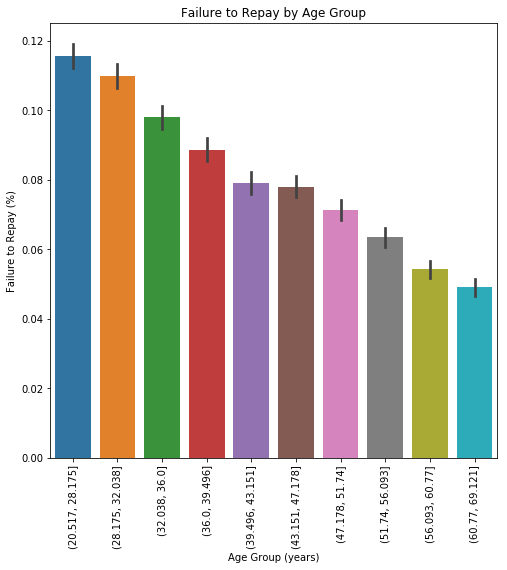

In [9]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = 'BIN'
py = 'TARGET'
sns.barplot(px, py, data=ageq)

# Plot labeling
plt.xticks(rotation = 90); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');